# 感知机改进算法

## 导包

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from sklearn import preprocessing

font = r'C:\Windows\Fonts\simfang.ttf'

## 导入数据集

In [2]:
data = pd.read_csv(r"./dataset/iris.csv")
data

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## 数据解释  
1.萼片长度（以厘米计）  
2.萼片宽度（以厘米计）  
3.花瓣长度（以厘米计）  
4.花瓣宽度（以厘米计）  
5.类别：  

## 数据预处理  

### 选择数据集中四列数据  
两列作为输入数据，一列作为输出数据

In [3]:
col = ['sepal width','petal width','class']
data = pd.DataFrame(data,columns = col)

### 取前100行作为本次实验数据

In [4]:
data = data[:100]
len(data)

100

### 重写class

In [5]:
data.loc[(data['class']=='Iris-setosa'),'class'] = -1
data.loc[(data['class']=='Iris-versicolor'),'class'] = 1

### 打乱数据

In [6]:
data = data.sample(frac=1)
data

,sepal width,petal width,class
46,3.8,0.2,-1
3,3.1,0.2,-1
81,2.4,1.0,1
44,3.8,0.4,-1
38,3.0,0.2,-1
...,...,...,...
73,2.8,1.2,1
83,2.7,1.6,1
55,2.8,1.3,1
80,2.4,1.1,1


### 取值

In [7]:
data = data.values

### 绘图

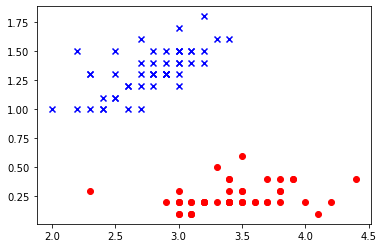

In [8]:
for i in range(len(data)):
    if data[i][-1] == -1:
        plt.scatter(data[i][0],data[i][1],c='r',marker='o')
    else:
        plt.scatter(data[i][0],data[i][1],c='b',marker='x')
plt.show()

### 划分训练集与测试集

In [9]:
training = data[:70]
test = data[70:]
len(test)

30

In [10]:
x = test[0][:-1]
x

array([2.0, 1.0], dtype=object)

In [11]:
y = test[0][-1:]
y

array([1], dtype=object)

# 一些工具函数

In [12]:
def makeArray(I,J):
    m = []
    for i in range(I):
        fill = np.random.random()
        m.append([fill]*J)
    return m

In [13]:
def sign(a):
    if a>0:
        return 1
    else:
        return -1

# 一、感知机模型

In [14]:
def feeling():
    w = np.zeros(2)
    lr = 0.01
    c = 1
#     循环遍历计数
    cnt = 0
    while True:
        cnt += 1
#         遍历次数超过1000时跳出循环，学习结束
        if cnt > 1000:
            break
        for i in range(len(training)):
            x = np.array(training[i][:-1])
            y = np.array(training[i][-1])

            s = np.sum(w*x)+c
            z = sign(s)
            if y * z <= 0:
#                 e = y-z
#                 w = w+lr*e*x
#                 c = np.sum(c+lr*e)
                w = w+lr*y*x
                c = c+lr*y
    return cnt,w,c

迭代次数： 1001
超平面法向量： [-0.39500000000000013 0.36100000000000015]
阈值： 0.7699999999999998


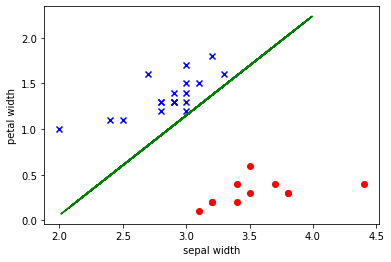

测试集准确率： 1.0


In [15]:
if __name__=='__main__':
    cnt,w,c=feeling()
    print("迭代次数：",cnt)
    print("超平面法向量：",w)
    print("阈值：",c)
    count = 0
    for i in range(len(test)):
        target = test[i][-1:]
        result = sign(np.sum(w*test[i][:-1])+c)
        if(target == result):
            count += 1
    accuracy = float(count/len(test))
    for i in range(len(test)):
        if test[i][-1] == -1:
            plt.scatter(test[i][0],test[i][1],c='r',marker='o')
        else:
            plt.scatter(test[i][0],test[i][1],c='b',marker='x')
#     for i in range(len(data)):
#         if training[i][-1] == -1:
#             plt.scatter(data[i][0],data[i][1],c='r')
#         else:
#             plt.scatter(data[i][0],data[i][1],c='b')
    X = np.random.uniform(2,4,100)
    Y = -(w[0]*X+c)/w[1]
    plt.xlabel('sepal width')
    plt.ylabel('petal width')
    plt.plot(X,Y,'g')
    plt.show()
    print("测试集准确率：",accuracy)

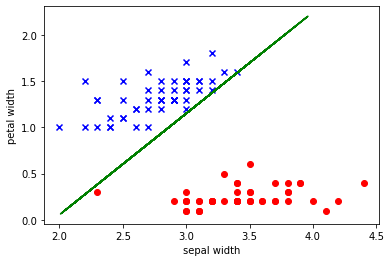

In [16]:
for i in range(len(data)):
    if data[i][-1] == -1:
        plt.scatter(data[i][0],data[i][1],c='r',marker='o')
    else:
        plt.scatter(data[i][0],data[i][1],c='b',marker='x')
X = np.random.uniform(2,4,100)
Y = -(w[0]*X+c)/w[1]
plt.xlabel('sepal width')
plt.ylabel('petal width')
plt.plot(X,Y,'g')
plt.show()

# 二、口袋算法

In [17]:
def checkErrorRate(training,w,c):
    count=0
    for i in range(len(training)):
        x=np.array(training[i][:-1])
        y=training[i][-1]
        if sign(np.sum(w*x)+c)!=sign(y):
            count+=1
    return count/len(training)

In [18]:
def Pocket():
    w = np.zeros(2)
    lr = 0.01
    c = 1
    best_w = w
    bestRate = 1
    best_c = c
#     循环遍历计数
    cnt = 0
    while True:
        cnt += 1
#         遍历次数超过1000时跳出循环，学习结束
        if cnt > 1000:
            break
        for i in range(len(training)):
            x = np.array(training[i][:-1])
            y = training[i][-1]
            
            s = np.sum(w*x)+c
            z = sign(s)
            if y * z <= 0:
#                 e = y-z
#                 w = w+lr*e*x
#                 c = np.sum(c+lr*e)
                w = w+lr*y*x
                c = c+lr*y
                rate = checkErrorRate(training,w,c)
                if rate<bestRate:
                    bestRate = rate
                    print("bestRate update:",bestRate)
                    best_w = w
                    best_c = c
    return cnt,best_w,best_c

bestRate update: 0.5571428571428572
bestRate update: 0.45714285714285713
bestRate update: 0.24285714285714285
bestRate update: 0.18571428571428572
bestRate update: 0.14285714285714285
bestRate update: 0.1
bestRate update: 0.08571428571428572
bestRate update: 0.05714285714285714
bestRate update: 0.02857142857142857
bestRate update: 0.014285714285714285
bestRate update: 0.0
迭代次数： 1001
超平面法向量： [-0.39500000000000013 0.36100000000000015]
阈值： 0.7699999999999998


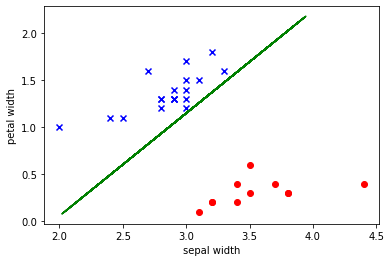

准确率： 1.0


In [19]:
if __name__=='__main__':
    cnt,best_w,best_c=Pocket()
    print("迭代次数：",cnt)
    print("超平面法向量：",best_w)
    print("阈值：",best_c)
    count = 0
    for i in range(len(test)):
        target = test[i][-1:]
        result = sign(np.sum(best_w*test[i][:-1])+best_c)
        if(target == result):
            count += 1
    accuracy = float(count/len(test))
    for i in range(len(test)):
        if test[i][-1] == -1:
            plt.scatter(test[i][0],test[i][1],c='r',marker='o')
        else:
            plt.scatter(test[i][0],test[i][1],c='b',marker='x')
#     for i in range(len(data)):
#         if data[i][-1] == -1:
#             plt.scatter(data[i][0],data[i][1],c='r')
#         else:
#             plt.scatter(data[i][0],data[i][1],c='b')
    X = np.random.uniform(2,4,100)
    Y = -(best_w[0]*X+best_c)/best_w[1]
    plt.plot(X,Y,'g')
    plt.xlabel('sepal width')
    plt.ylabel('petal width')
    plt.show()
    print("准确率：",accuracy)

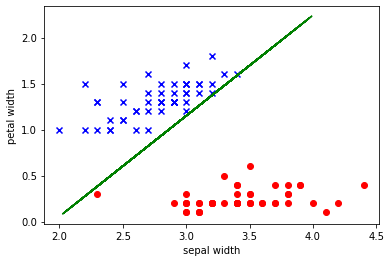

In [20]:
for i in range(len(data)):
    if data[i][-1] == -1:
        plt.scatter(data[i][0],data[i][1],c='r',marker='o')
    else:
        plt.scatter(data[i][0],data[i][1],c='b',marker='x')
X = np.random.uniform(2,4,100)
Y = -(best_w[0]*X+best_c)/best_w[1]
plt.xlabel('sepal width')
plt.ylabel('petal width')
plt.plot(X,Y,'g')
plt.show()